# Lecture 8 - Data Cleaning 

### DATA 2201, Fall 2024 

*Adapted from Data 100 and DSC 80* 

Covers the 4 pillars of Data Cleaning. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
from IPython.display import display, IFrame, HTML

from pathlib import Path

## Food Safety Demo 

### Dataset overview 

From [this article](https://inewsource.org/2023/02/09/san-diego-restaurants-food-safety-violations/) ([archive link](https://archive.ph/gz8BL)):

> In the last three years, one third of San Diego County restaurants have had at least one major food safety violation.




#### 99% Of San Diego Restaurants Earn ‘A' Grades, Bringing Usefulness of System Into Question

From [this article](https://www.nbcsandiego.com/news/local/99-of-san-diego-restaurants-earn-a-grades-bringing-usefulness-of-system-into-question/25381/) ([archive link](https://archive.ph/yB6RU)):

> Food held at unsafe temperatures. Employees not washing their hands. Dirty countertops. Vermin in the kitchen. An expired restaurant permit.
> 
> Restaurant inspectors for San Diego County found these violations during a routine health inspection of a diner in La Mesa in November 2016. Despite the violations, the restaurant was awarded a score of 90 out of 100, the lowest possible score to achieve an ‘A’ grade.

### The data 

- We downloaded the data about the 1000 restaurants closest to UCSD from [here](https://www.sandiegocounty.gov/content/sdc/deh/fhd/ffis/intro.html.html).
- We had to download the data as JSON files, then process it into DataFrames. You'll learn how to do this soon!
    - Until now, you've (largely) been presented with CSV files that `pd.read_csv` could load without any issues.
    - But there are many different formats and possible issues when loading data in from files.
    - See [Chapter 8 of Learning DS](https://learningds.org/ch/08/files_intro.html) for more.

In [2]:
# You'll see the Path(...) / subpath syntax a lot.
# It creates the correct path to your file, 
# whether you're using Windows, macOS, or Linux.
rest_path = Path('data') / 'restaurants.csv'
insp_path = Path('data') / 'inspections.csv'
viol_path = Path('data') / 'violations.csv'

In [3]:
rest = pd.read_csv(rest_path)
insp = pd.read_csv(insp_path)
viol = pd.read_csv(viol_path)

#### Review the data

In [4]:
rest.head(2)

,business_id,name,business_type,address,city,zip,phone,status,lat,long,opened_date,distance
0,211898487641,MOBIL MART LA JOLLA VILLAGE,Pre-Packaged Retail Market,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",LA JOLLA,92037,858-453-8153,Permit Renewed,32.871201,-117.233328,2002-05-05,0.62
1,211930769329,CAFE 477,Low Risk Food Facility,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",LA JOLLA,92037-1704,858-900-1400,Issued,32.870904,-117.235216,2023-07-24,0.64


In [5]:
rest.columns

Index(['business_id', 'name', 'business_type', 'address', 'city', 'zip',
       'phone', 'status', 'lat', 'long', 'opened_date', 'distance'],
      dtype='object')

In [6]:
insp.head(2)

,custom_id,business_id,inspection_id,description,type,score,grade,completed_date,status,link,status_link
0,DEH2002-FFPN-310012,211898487641,6886133,NaN,Routine,96,NaN,2023-02-16,Complete,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...
1,DEH2002-FFPN-310012,211898487641,6631228,NaN,Routine,98,NaN,2022-01-03,Complete,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...


In [7]:
insp.columns

Index(['custom_id', 'business_id', 'inspection_id', 'description', 'type',
       'score', 'grade', 'completed_date', 'status', 'link', 'status_link'],
      dtype='object')

In [8]:
viol.head(2)

,inspection_id,violation,major_violation,status,violation_text,correction_type_link,violation_accela,link
0,6886133,Hot and Cold Water,Y,Out of Compliance - Major,Hot and Cold Water,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...,21. Hot & cold water available,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...
1,6631228,Hot and Cold Water,N,Out of Compliance - Minor,Hot and Cold Water,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...,21. Hot & cold water available,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...


In [9]:
viol.columns

Index(['inspection_id', 'violation', 'major_violation', 'status',
       'violation_text', 'correction_type_link', 'violation_accela', 'link'],
      dtype='object')

# Data Cleaning 

### Four Pillars of Data Cleaning 

When loading in a dataset, to clean the data – that is, to prepare it for further analysis – we will:

1. Perform **data quality checks**.

2. Identify and handle **missing values**.

3. Perform **transformations**, including converting time series data to **timestamps**.

4. Modify **structure** as necessary.

## Data Cleaning: Data quality checks 

We often start an analysis by checking the quality of the data.

- Scope: Do the data match your understanding of the population? 
- Measurements and values: Are the values reasonable?
- Relationships: Are related features in agreement?
- Analysis: Which features might be useful in a future analysis? 

### Scope

Do the data match your understanding of the population?


We were told that we're only looking at the 1000 restaurants closest to UCSD, so the restaurants in `rest` should agree with that.

In [10]:
rest.sample(5)

,business_id,name,business_type,address,city,zip,phone,status,lat,long,opened_date,distance
160,211959597249,85C BAKERY CAFE,Restaurant Food Facility,"4313 LA JOLLA VILLAGE DR, SUITE# 2275, SAN DIE...",SAN DIEGO,92122-1241,714-459-9565,Permit Renewed,32.871541,-117.210592,2018-02-12,1.48
472,211963176984,COVE HOUSE,Restaurant Food Facility,"8030 GIRARD AVE, LA JOLLA, CA 92037-4137",LA JOLLA,92037-4137,858-999-0034,Permit Renewed,32.848249,-117.274511,2019-03-22,3.22
67,211898851974,AMC THEATRES LA JOLLA 12,Low Risk Food Facility,"8657 VILLA LA JOLLA DR, LA JOLLA, CA 92037",LA JOLLA,92037,816-480-5862,Permit Renewed,32.864807,-117.232167,2003-01-10,1.06
610,211899113771,CVS PHARMACY #9926,Pre-Packaged Retail Market,"7525 EADS AVE, LA JOLLA, CA 92037",LA JOLLA,92037,401-770-2272,Permit Renewed,32.840456,-117.274705,2009-06-17,3.62
913,211950997413,BLUE BOTTLE COFFEE,Restaurant Food Facility,"3725 PASEO PL, SUITE# 1060, SAN DIEGO, CA 92130",SAN DIEGO,92130,510-978-9003,Permit Renewed,32.948168,-117.225204,2018-09-17,4.73


### Measurements and values 

Are the values reasonable? 

Do the values in the `'grade'` column match what we'd expect grades to look like?

In [11]:
insp['grade'].value_counts()

grade
A    2978
B      11
Name: count, dtype: int64

What kinds of information does the `insp` DataFrame hold?

In [12]:
insp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5179 entries, 0 to 5178
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custom_id       5179 non-null   object 
 1   business_id     5179 non-null   int64  
 2   inspection_id   5179 non-null   int64  
 3   description     0 non-null      float64
 4   type            5179 non-null   object 
 5   score           5179 non-null   int64  
 6   grade           2989 non-null   object 
 7   completed_date  5179 non-null   object 
 8   status          5179 non-null   object 
 9   link            5179 non-null   object 
 10  status_link     5179 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 445.2+ KB


What's going on in the `'address'` column of `rest`?

In [13]:
# Are there multiple restaurants with the same address?
rest['address'].value_counts()

address
5300 GRAND DEL MAR CT, SAN DIEGO, CA 92130          9
8657 VILLA LA JOLLA DR, LA JOLLA, CA 92037          8
4545 LA JOLLA VILLAGE DR, SAN DIEGO, CA 92122       8
10950 N TORREY PINES RD, LA JOLLA, CA 92037-1006    6
9932 MESA RIM RD, SAN DIEGO, CA 92121-3930          6
                                                   ..
4077 GOVERNOR DR, SAN DIEGO, CA 92122               1
3993 GOVERNOR DR, SAN DIEGO, CA 92122               1
3963 GOVERNOR DR, SAN DIEGO, CA 92122               1
4041 GOVERNOR DR, SAN DIEGO, CA 92122-2520          1
2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014          1
Name: count, Length: 863, dtype: int64

In [14]:
# Keeps all rows with duplicate addresses.
(
    rest
    .groupby('address')
    .filter(lambda df: df.shape[0] >= 2)
    .sort_values('address')
)

,business_id,name,business_type,address,city,zip,phone,status,lat,long,opened_date,distance
406,211899308875,NASEEMS BAKERY & KABOB,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",SAN DIEGO,92121,858-453-3900,Permit Renewed,32.900799,-117.193183,2012-04-17,2.77
402,211898699154,HANAYA SUSHI CAFE,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",SAN DIEGO,92121,858-880-8645,Permit Renewed,32.900799,-117.193183,2011-03-22,2.77
401,211899558107,ARMANDOS MEXICAN FOOD,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",SAN DIEGO,92121,858-554-0280,Permit Renewed,32.900799,-117.193183,2005-06-28,2.77
412,211976116534,QUALCOMM CAFE AZ,Restaurant Food Facility,"10165 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 9212...",SAN DIEGO,92121-4214,704-328-5521,Permit Renewed,32.903280,-117.194167,2014-01-16,2.81
411,211910439843,FUJISAN SUSHI,Restaurant Food Facility,"10165 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 9212...",SAN DIEGO,92121-4214,562-404-2590 X 143,Permit Renewed,32.903280,-117.194167,2019-07-31,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...
534,211988995792,DOMINANT DIVISION MEAL PREP,Retail Food Processing,"9932 MESA RIM RD, SUITE# A, SAN DIEGO, CA 9212...",SAN DIEGO,92121-3930,858-431-6884,Permit Renewed,32.899251,-117.180022,2022-06-29,3.40
574,211898894441,SHARED KITCHEN / AMALFI MOBILE PIZZERIA,Caterer,"9932 MESA RIM RD, SUITE# A, SAN DIEGO, CA 9212...",SAN DIEGO,92121-3930,619-546-8877,Permit Renewed,32.899837,-117.178201,2010-12-14,3.51
575,211972411855,TARA HEATHER CAKE DESIGN,Caterer,"9932 MESA RIM RD, SUITE# A, SAN DIEGO, CA 9212...",SAN DIEGO,92121-3930,858-610-6500,Permit Renewed,32.899837,-117.178201,2014-04-24,3.51
344,211990537315,COMPASS GROUP FEDEX EXPRESS OLSON,Pre-Packaged Retail Market,"9999 OLSON DR, SAN DIEGO, CA 92121-2837",SAN DIEGO,92121-2837,619-527-1900,Issued,32.886832,-117.195721,2022-10-19,2.27


In [15]:
# Does the same thing as above!
(
    rest[rest.duplicated(subset=['address'], keep=False)]
    .sort_values('address')
)

,business_id,name,business_type,address,city,zip,phone,status,lat,long,opened_date,distance
406,211899308875,NASEEMS BAKERY & KABOB,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",SAN DIEGO,92121,858-453-3900,Permit Renewed,32.900799,-117.193183,2012-04-17,2.77
402,211898699154,HANAYA SUSHI CAFE,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",SAN DIEGO,92121,858-880-8645,Permit Renewed,32.900799,-117.193183,2011-03-22,2.77
401,211899558107,ARMANDOS MEXICAN FOOD,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",SAN DIEGO,92121,858-554-0280,Permit Renewed,32.900799,-117.193183,2005-06-28,2.77
412,211976116534,QUALCOMM CAFE AZ,Restaurant Food Facility,"10165 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 9212...",SAN DIEGO,92121-4214,704-328-5521,Permit Renewed,32.903280,-117.194167,2014-01-16,2.81
411,211910439843,FUJISAN SUSHI,Restaurant Food Facility,"10165 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 9212...",SAN DIEGO,92121-4214,562-404-2590 X 143,Permit Renewed,32.903280,-117.194167,2019-07-31,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...
534,211988995792,DOMINANT DIVISION MEAL PREP,Retail Food Processing,"9932 MESA RIM RD, SUITE# A, SAN DIEGO, CA 9212...",SAN DIEGO,92121-3930,858-431-6884,Permit Renewed,32.899251,-117.180022,2022-06-29,3.40
574,211898894441,SHARED KITCHEN / AMALFI MOBILE PIZZERIA,Caterer,"9932 MESA RIM RD, SUITE# A, SAN DIEGO, CA 9212...",SAN DIEGO,92121-3930,619-546-8877,Permit Renewed,32.899837,-117.178201,2010-12-14,3.51
575,211972411855,TARA HEATHER CAKE DESIGN,Caterer,"9932 MESA RIM RD, SUITE# A, SAN DIEGO, CA 9212...",SAN DIEGO,92121-3930,858-610-6500,Permit Renewed,32.899837,-117.178201,2014-04-24,3.51
344,211990537315,COMPASS GROUP FEDEX EXPRESS OLSON,Pre-Packaged Retail Market,"9999 OLSON DR, SAN DIEGO, CA 92121-2837",SAN DIEGO,92121-2837,619-527-1900,Issued,32.886832,-117.195721,2022-10-19,2.27


### Relationships 

Are related features in agreement? 


Do the `'address'`es and `'zip'` codes in `rest` match? 



In [16]:
rest[['address', 'zip']]

,address,zip
0,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037
1,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",92037-1704
2,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",92037
3,"9888 GENESEE AVE, LA JOLLA, CA 92037-1205",92037-1205
4,"9850 GENESEE AVE, LA JOLLA, CA 92037",92037
...,...,...
995,"2634 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014
996,"12873 EL CAMINO REAL, SUITE# M4, SAN DIEGO, CA...",92130
997,"1234 TOURMALINE ST, SAN DIEGO, CA 92109-1856",92109-1856
998,"12925 EL CAMINO REAL, SUITE# AA4, SAN DIEGO, C...",92130


What about the `'score'`s and `'grade'`s in `insp`?

In [17]:
insp[['score', 'grade']]

,score,grade
0,96,NaN
1,98,NaN
2,98,NaN
3,100,A
4,0,NaN
...,...,...
5174,0,NaN
5175,84,B
5176,0,NaN
5177,0,NaN


### Analysis 


Which features might be useful in a future analysis?

- We're most interested in:
    - These columns in the `rest` DataFrame: `'business_id'`, `'name'`, `'address'`, `'zip'`, and `'opened_date'`.
    - These columns in the `insp` DataFrame: `'business_id'`, `'inspection_id'`, `'score'`, `'grade'`, `'completed_date'`, and `'status'`.
    - These columns in the `viol` DataFrame: `'inspection_id'`, `'violation'`, `'major_violation'`, `'violation_text'`, and `'violation_accela'`.

- Also, let's rename a few columns to make them easier to work with.

### 💡 Pro-Tip: Using `pipe`

When we manipulate DataFrames, it's best to define individual functions for each step, then use the `pipe` **method** to chain them all together.

The `pipe` DataFrame method takes in a function, which itself takes in a DataFrame and returns a DataFrame.

- In practice, we would add functions one by one to the top of a notebook, then `pipe` them all.
- For today, will keep re-running `pipe` to show data cleaning process.

In [18]:
def subset_rest(rest):
    return rest[['business_id', 'name', 'address', 'zip', 'opened_date']]

rest = (
    pd.read_csv(rest_path)
    .pipe(subset_rest)
)
rest

,business_id,name,address,zip,opened_date
0,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,2002-05-05
1,211930769329,CAFE 477,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",92037-1704,2023-07-24
2,211909057778,VALLEY FARM MARKET,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",92037,2019-01-22
3,211921416009,INTERNATIONAL COFFEE,"9888 GENESEE AVE, LA JOLLA, CA 92037-1205",92037-1205,2020-11-20
4,211898851506,LA JOLLA DISCOUNT PHARMACY,"9850 GENESEE AVE, LA JOLLA, CA 92037",92037,2002-05-05
...,...,...,...,...,...
995,211994852553,LE BAMBOU RESTAURANT,"2634 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,2019-09-16
996,211924765619,MENDOCINO FARMS SANDWICH MARKET,"12873 EL CAMINO REAL, SUITE# M4, SAN DIEGO, CA...",92130,2017-01-18
997,211899338714,PACIFIC BEACH ELEMENTARY,"1234 TOURMALINE ST, SAN DIEGO, CA 92109-1856",92109-1856,2002-05-05
998,211942150255,POKEWAN DEL MAR,"12925 EL CAMINO REAL, SUITE# AA4, SAN DIEGO, C...",92130,2016-11-03


In [19]:
# Same as the above – but the above makes it easier to chain more .pipe calls afterwards.
subset_rest(pd.read_csv(rest_path))

,business_id,name,address,zip,opened_date
0,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,2002-05-05
1,211930769329,CAFE 477,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",92037-1704,2023-07-24
2,211909057778,VALLEY FARM MARKET,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",92037,2019-01-22
3,211921416009,INTERNATIONAL COFFEE,"9888 GENESEE AVE, LA JOLLA, CA 92037-1205",92037-1205,2020-11-20
4,211898851506,LA JOLLA DISCOUNT PHARMACY,"9850 GENESEE AVE, LA JOLLA, CA 92037",92037,2002-05-05
...,...,...,...,...,...
995,211994852553,LE BAMBOU RESTAURANT,"2634 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,2019-09-16
996,211924765619,MENDOCINO FARMS SANDWICH MARKET,"12873 EL CAMINO REAL, SUITE# M4, SAN DIEGO, CA...",92130,2017-01-18
997,211899338714,PACIFIC BEACH ELEMENTARY,"1234 TOURMALINE ST, SAN DIEGO, CA 92109-1856",92109-1856,2002-05-05
998,211942150255,POKEWAN DEL MAR,"12925 EL CAMINO REAL, SUITE# AA4, SAN DIEGO, C...",92130,2016-11-03


Let's use `pipe` to keep (and rename) the subset of the columns we care about in the other two DataFrames as well.

In [20]:
def subset_insp(insp):
    return (
        insp[['business_id', 'inspection_id', 'score', 'grade', 'completed_date', 'status']]
        .rename(columns={'completed_date': 'date'})
    )

insp = (
    pd.read_csv(insp_path)
    .pipe(subset_insp)
)

In [21]:
def subset_viol(viol):
    return (
        viol[['inspection_id', 'violation', 'major_violation', 'violation_accela']]
        .rename(columns={'violation': 'kind',
                         'major_violation': 'is_major',
                         'violation_accela': 'violation'})
    )

viol = (
    pd.read_csv(viol_path)
    .pipe(subset_viol)
)

### Combining the restaurant data

Let's join all three DataFrames together so that we have all the data in a single DataFrame.

In [22]:
def merge_all_restaurant_data():
    return (
        rest
        .merge(insp, on='business_id', how='left')
        .merge(viol, on='inspection_id', how='left')
    )

df = merge_all_restaurant_data()
df

,business_id,name,address,zip,opened_date,inspection_id,score,grade,date,status,kind,is_major,violation
0,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,2002-05-05,6886133.0,96.0,NaN,2023-02-16,Complete,Hot and Cold Water,Y,21. Hot & cold water available
1,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,2002-05-05,6631228.0,98.0,NaN,2022-01-03,Complete,Hot and Cold Water,N,21. Hot & cold water available
2,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,2002-05-05,6357338.0,98.0,NaN,2020-12-03,Complete,Holding Temperatures,N,7. Proper hot & cold holding temperatures
3,211930769329,CAFE 477,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",92037-1704,2023-07-24,7329834.0,100.0,A,2023-09-20,Complete,NaN,NaN,NaN
4,211909057778,VALLEY FARM MARKET,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",92037,2019-01-22,7233091.0,0.0,NaN,2023-05-26,Complete,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,2022-11-03,7104077.0,90.0,A,2022-11-30,Complete,Holding Temperatures,N,7. Proper hot & cold holding temperatures
8727,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,2022-11-03,7104077.0,90.0,A,2022-11-30,Complete,Nonfood Contact Surfaces Clean,N,33. Nonfood contact surfaces clean
8728,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,2022-11-03,7104077.0,90.0,A,2022-11-30,Complete,"Equipment and Utensil Storage, Use",N,"35. Equipment / Utensils -approved, installed,..."
8729,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,2022-11-03,7104077.0,90.0,A,2022-11-30,Complete,Toilet Facilities,N,"43. Toilet facilities -properly constructed, s..."


## Data Cleaning: Missing Values 

Next, it's important to check for and handle missing values, as they can have a big effect on your analysis.

In [23]:
insp[['score', 'grade']]

,score,grade
0,96,NaN
1,98,NaN
2,98,NaN
3,100,A
4,0,NaN
...,...,...
5174,0,NaN
5175,84,B
5176,0,NaN
5177,0,NaN


In [24]:
# The proportion of values in each column that are missing.
insp.isna().mean()

business_id      0.000000
inspection_id    0.000000
score            0.000000
grade            0.422862
date             0.000000
status           0.000000
dtype: float64

In [25]:
# Why are there null values here?
# insp['inspection_id'] and viol['inspection_id'] don't have any null values...
df[df['inspection_id'].isna()]

,business_id,name,address,zip,opened_date,inspection_id,score,grade,date,status,kind,is_major,violation
759,211941133403,TASTY CHAI,"8878 REGENTS RD 105, SAN DIEGO, CA 92122-5853",92122-5853,2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,211915545446,EMBASSY SUITES SAN DIEGO LA JOLLA,"4550 LA JOLLA VILLAGE DR, SAN DIEGO, CA 92122-...",92122-1248,2022-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672,211937443689,SERVICENOW,"4770 EASTGATE MALL, SAN DIEGO, CA 92121-1970",92121-1970,2023-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2526,211915567037,CAFE BOLERO,"5623 STRESEMANN ST, SAN DIEGO, CA 92122-3125",92122-3125,2022-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2755,211957674080,BUSY BEES,"5496 BLOCH ST, SAN DIEGO, CA 92122-4010",92122-4010,2013-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2984,211998382067,MALLOW BITES,"6010 AGEE ST, SAN DIEGO, CA 92122-3717",92122-3717,2023-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3480,211954104632,THE WILD THYME COMPANY,"8547 MIRAMAR PL, SAN DIEGO, CA 92121-2529",92121-2529,2023-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3566,211935879286,KEVIES KITCHEN,"5371 COLE ST, SAN DIEGO, CA 92117-1120",92117-1120,2015-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3869,211917574259,DOUGH MY GOODNESS COOKIES,"3575 ARGONNE ST, SAN DIEGO, CA 92117-1009",92117-1009,2020-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3939,211938154585,BENNY COOKIES,"1141 SILVERADO ST, LA JOLLA, CA 92037-4525",92037-4525,2021-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are many ways of handling missing values, which we'll cover more shortly. But a good first step is to check how many there are!

## Data Cleaning: Transformations and timestamps 

Transformations: 

> A transformation results from performing some operation on every element in a sequence, e.g. a Series.

It's often useful to look at ways of transforming your data to make it easier to work with.

- Type conversions (e.g. changing the string `"$2.99"` to the number `2.99`).

- Unit conversion (e.g. feet to meters).

- Extraction (Getting `'vermin'` out of `'Vermin Violation Recorded on 10/10/2023'`).

### Creating timestamps

Most commonly, we'll parse dates into `pd.Timestamp` objects.

In [26]:
# Look at the dtype!
insp['date']

0       2023-02-16
1       2022-01-03
2       2020-12-03
3       2023-09-20
4       2023-05-26
           ...    
5174    2023-09-21
5175    2023-09-14
5176    2023-03-06
5177    2022-12-09
5178    2022-11-30
Name: date, Length: 5179, dtype: object

In [27]:
# This magical string tells Python what format the date is in.
# For more info: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
date_format = '%Y-%m-%d'
pd.to_datetime(insp['date'], format=date_format)

0      2023-02-16
1      2022-01-03
2      2020-12-03
3      2023-09-20
4      2023-05-26
          ...    
5174   2023-09-21
5175   2023-09-14
5176   2023-03-06
5177   2022-12-09
5178   2022-11-30
Name: date, Length: 5179, dtype: datetime64[ns]

In [28]:
# Another advantage of defining functions is that we can reuse this function
# for the 'opened_date' column in `rest` if we wanted to.
def parse_dates(insp, col):
    date_format = '%Y-%m-%d'
    dates = pd.to_datetime(insp[col], format=date_format)
    return insp.assign(**{col: dates})

insp = (
    pd.read_csv(insp_path)
    .pipe(subset_insp)
    .pipe(parse_dates, 'date')
)

# We should also remake df, since it depends on insp.
# Note that the new insp is used to create df!
df = merge_all_restaurant_data()

In [29]:
# Look at the dtype now!
df['date']

0      2023-02-16
1      2022-01-03
2      2020-12-03
3      2023-09-20
4      2023-05-26
          ...    
8726   2022-11-30
8727   2022-11-30
8728   2022-11-30
8729   2022-11-30
8730   2022-11-30
Name: date, Length: 8731, dtype: datetime64[ns]

### Working with timestamps 

- We often want to adjust granularity of timestamps to see overall trends, or seasonality.
- Use the `resample` method in `pandas` ([documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)).
    - Think of it like a version of `groupby`, but for timestamps.
    - For instance, `insp.resample('2W', on='date')` separates every two weeks of data into a different group.

In [30]:
insp.resample('2W', on='date').mean(numeric_only = True)

,business_id,inspection_id,score
date,,,
2020-01-05,2.119296e+11,6.350556e+06,42.666667
2020-01-19,2.119294e+11,6.303257e+06,59.325581
2020-02-02,2.119302e+11,6.316508e+06,56.340909
2020-02-16,2.119328e+11,6.330106e+06,71.500000
2020-03-01,2.119231e+11,6.314435e+06,76.972222
...,...,...,...
2023-08-27,2.119385e+11,7.211905e+06,68.896552
2023-09-10,2.119353e+11,7.152024e+06,75.685714
2023-09-24,2.119353e+11,7.149838e+06,66.600000


In [31]:
# Where are those numbers coming from?
insp[
    (insp['date'] >= pd.Timestamp('2020-01-05')) &
    (insp['date'] < pd.Timestamp('2020-01-19'))
]['score']

10        0
11       92
12        0
24       93
40        0
       ... 
4629     91
4701    100
4709      0
4988    100
5107     96
Name: score, Length: 86, dtype: int64

<Axes: title={'center': 'Number of Inspections Over Time'}, xlabel='date'>

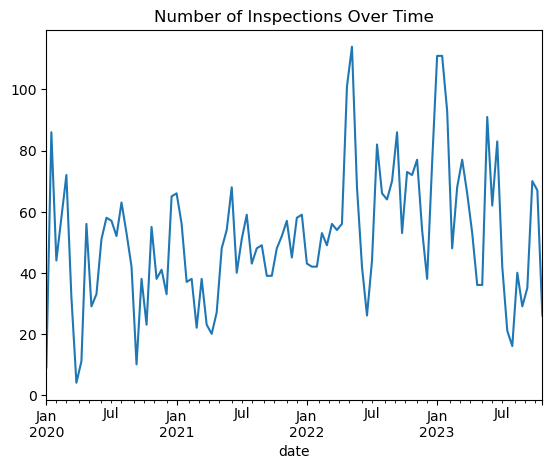

In [32]:
(insp.resample('2W', on='date')
 .size()
 .plot(title='Number of Inspections Over Time')
)

### The `.dt` accessor 

You have already seen how to use the `.dt` accessor for properties of timestamps ([documentation](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors)).

## Data Cleaning: Modifying structure 

### Reshaping DataFrames

We often **reshape** the DataFrame's structure to make it more convenient for analysis. For example, we can:

- Simplify structure by removing columns or taking a set of rows for a particular period of time or geographic area.
    - We already did this!

- Adjust granularity by aggregating rows together.
    - To do this, use `groupby` (or `resample`, if working with timestamps).

- Reshape structure, most commonly by using the DataFrame `melt` method to un-pivot a dataframe.

### Using `melt`

- The `melt` method is common enough that we'll give it a special mention.
- We'll often encounter pivot tables (esp. from government data), which we call *wide* data.
- The methods we've introduced work better with *long-form* data, or *tidy* data.
- To go from wide to long, `melt`.

<center><img src='imgs/wide-vs-long.svg' width=40%></center>

### Example usage of `melt`

In [33]:
wide_example = pd.DataFrame({
    'Year': [2001, 2002],
    'Jan': [10, 130],
    'Feb': [20, 200],
    'Mar': [30, 340]
}).set_index('Year')
wide_example

,Jan,Feb,Mar
Year,,,
2001,10,20,30
2002,130,200,340


In [34]:
wide_example.melt(ignore_index=False)

,variable,value
Year,,
2001,Jan,10
2002,Jan,130
2001,Feb,20
2002,Feb,200
2001,Mar,30
2002,Mar,340
